# Deterministic Nonrenewable Resource Model

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demdoc03.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## About

Welfare maximizing social planner must decide the rate at which a nonrenewable resource should be harvested.

* State
  - s     resource stock
* Control
  - q     harvest rate
* Parameters
  - κ     harvest unit cost scale factor
  - γ     harvest unit cost elasticity
  - η     inverse elasticity of demand
  - 𝜌     continuous discount rate

## Preliminary tasks

### Import relevant packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, OCmodel

### Model parameters

In [2]:
κ = 10     # harvest unit cost scale factor
γ = 1      # harvest unit cost elasticity
η = 1.5    # inverse elasticity of demand
𝜌 = 0.05   # continuous discount rate

### Approximation structure

In [3]:
n = 20          # number of basis functions
smin = 0.1        # minimum state
smax = 1.0        # maximum state
basis = BasisChebyshev(n, smin, smax, labels=['q'])  # basis functions


## Solve HJB equation by collocation

In [4]:
def control(s, Vs, κ, γ, η, 𝜌):
    k = κ * s**(-γ)
    return (Vs + k)**(-1/η)

def reward(s, q, κ, γ, η, 𝜌):
    u = (1/(1-η)) * q **(1-η)
    k = κ * s**(-γ)
    return u - k*q

def transition(s, q, κ, γ, η, 𝜌):
    return  -q

model = OCmodel(basis, control, reward, transition, rho=𝜌, params=[κ, γ, η, 𝜌])
data = model.solve()

Solving optimal control model
iter change       time    
------------------------------
   0       5.4e+02    0.0030
   1       1.2e+02    0.0030
   2       3.2e+01    0.0030
   3       9.2e+00    0.0040
   4       1.0e+00    0.0040
   5       7.2e-03    0.0050
   6       1.6e-06    0.0050
   7       4.5e-09    0.0060
Elapsed Time =    0.01 Seconds


## Plots

### Optimal policy

(0.0, 0.03578278411627879)

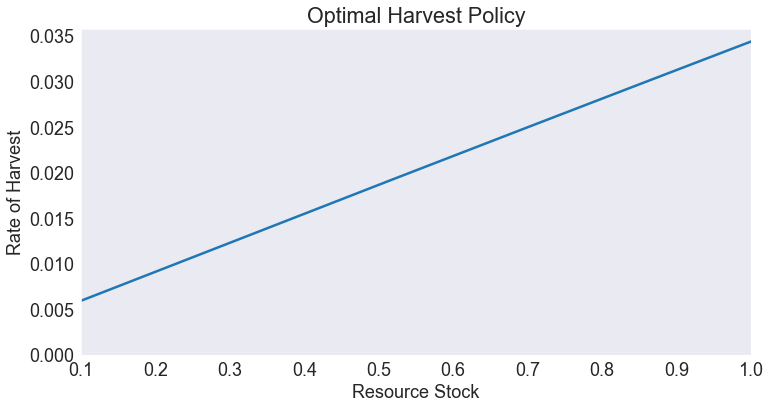

In [5]:
fig, ax = plt.subplots()
data['control'].plot(ax=ax)
ax.set(title='Optimal Harvest Policy',
       xlabel='Resource Stock',
       ylabel='Rate of Harvest',
       xlim=[smin, smax])
ax.set_ylim(bottom=0)

### Value function

[Text(0.5, 1.0, 'Value Function'),
 Text(0.5, 0, 'Resource Stock'),
 Text(0, 0.5, 'Social Welfare'),
 (0.1, 1.0)]

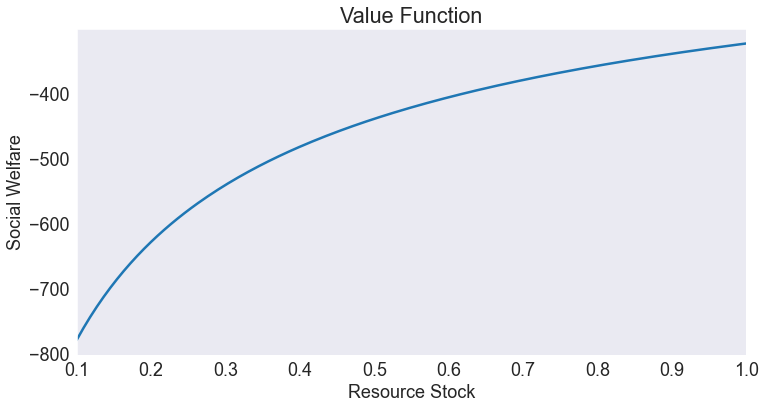

In [6]:
fig, ax = plt.subplots()
data['value'].plot(ax=ax)
ax.set(title='Value Function',
       xlabel='Resource Stock',
       ylabel='Social Welfare',
       xlim=[smin, smax])

### Shadow price

[Text(0.5, 1.0, 'Shadow Price Function'),
 Text(0.5, 0, 'Resource Stock'),
 Text(0, 0.5, 'Shadow Price'),
 (0.1, 1.0)]

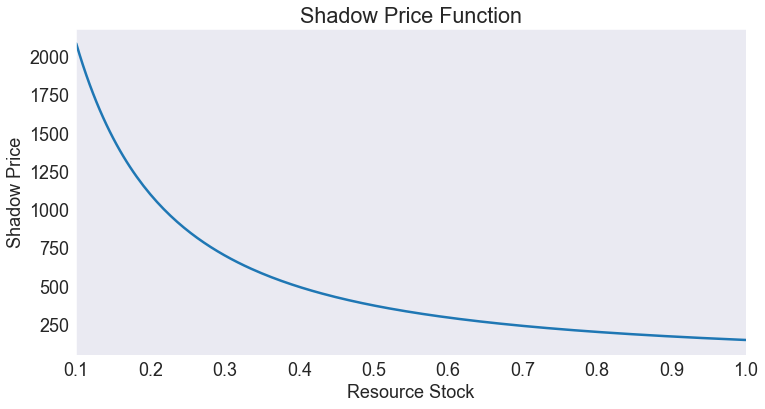

In [7]:
data['shadow'] = model.Value(data.index, 1)

fig, ax = plt.subplots()
data['shadow'].plot(ax=ax)
ax.set(title='Shadow Price Function',
       xlabel='Resource Stock',
       ylabel='Shadow Price',
       xlim=[smin, smax])

### Residual

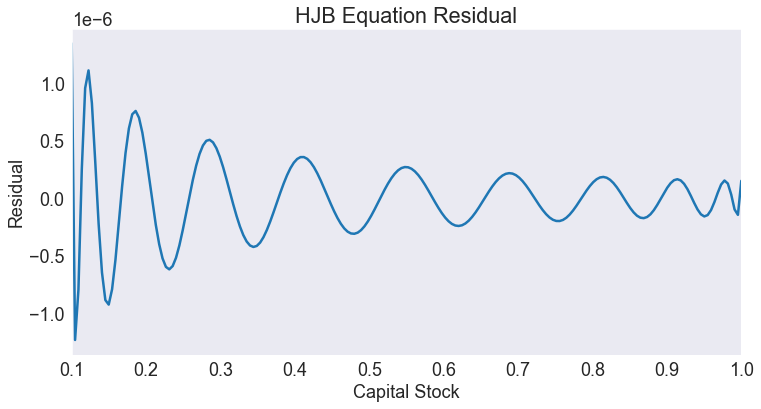

In [8]:
fig, ax = plt.subplots()
data['resid'].plot(ax=ax)
ax.set(title='HJB Equation Residual',
       xlabel='Capital Stock',
       ylabel='Residual',
       xlim=[smin, smax]);

## Simulate the model

### Initial state and time horizon

In [9]:
s0 = smax  # initial capital stock
T  = 40    # time horizon

### Simulation and plot

PARAMETER xnames NO LONGER VALID. SET labels= AT OBJECT CREATION


[Text(0.5, 1.0, 'Simulated Resource Stock and Rate of Harvest'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Quantity'),
 (0.0, 40.0)]

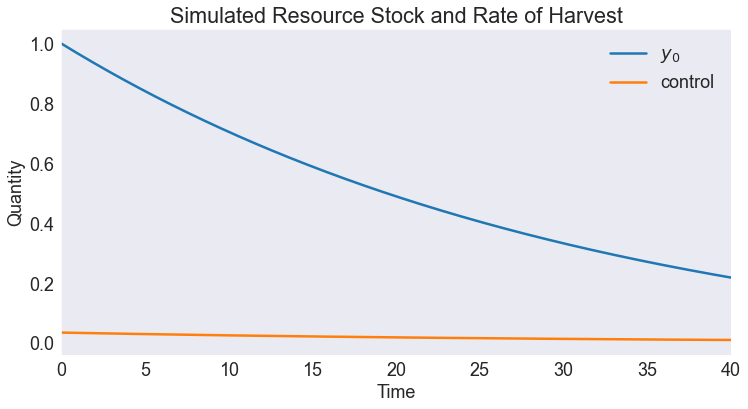

In [10]:
fig, ax = plt.subplots()
model.simulate([s0], T).plot(ax=ax)
ax.set(title='Simulated Resource Stock and Rate of Harvest',
       xlabel='Time',
       ylabel='Quantity',
       xlim=[0, T])

#ax.legend([]);


